# Project Milestone 3 - EDA

Please submit a 2-3 page document (Word, PDF, ipynb) by Wednesday, April 10th 9:59pm including the items outlined below. Your 2 - 3 page submission should include:

- Data Description: Provide any missing information from Milestone 2 based on the feedback you received from your TA. If your milestone 2 was complete and you didn’t miss anything, you can omit this point.

- Summary of the Data: Provide the shape of the data, data types, and descriptive statistics such as mean, max, and dtypes. Additionally, provide a summary of the features of the data, including histograms, correlation plots, and clustering plots as appropriate. 

- Data Anaylsis: Identify patterns, trends, class imbalances, and outliers in the data. Additionally, explore the relationships between variables and identify any potential confounding variables that may impact the analysis.

- Meaningful Insights: Based on your analysis of the data, provide meaningful insights. Meaningful insights are those that connect back to your problem and are relevant to your specific context. Any insights should be well-supported by the data, provide actionable recommendations, and have a brief justification for why or how it’s important to the project. 

- Clean and Labeled Visualization: Visualization is an important component of EDA and should be clean, labeled, and well-presented. You need to ensure that your visualizations are easy to understand and can be included in their final presentation slides or report. Anyone that reads your EDA should be able to understand what is depicted in the plots just by looking at them.

- Summary of findings: Summarize your findings in a clear and concise manner. This can be achieved through the use of visualizations and captions that highlight the most important insights gained through the analysis.

- (Revised) Project Question: Based on the insights gained through EDA, you should develop a clear project question that will guide your analysis. This question should be well-defined and specific to the problem at hand.

In the previous Project Milestone 2, our team successfully acquired and prepared our dataset for subsequent analysis. The data was sourced from Kaggle, obtaining a collection of over forty thousand product reviews divided into Original Reviews(OR) and Computer-Generated Fake Reviews(GC). The data was then preprocessed to clean the text data, one-hot encode the category column, standardize the rating column, and label encode the label column.

**shape**: The preprocessed data has 40432 rows and 13 columns. 

**data types**: The pandas dataframe has the column 'label' as integer, text_ as object, and remaining rating and category columns as float (0/1).

**column description**:

- rating: Represents the rating given to the product in the review.
- label: Indicates whether the review is genuine (1) or counterfeit (0).
- text_: Contains the actual text of the review provided by the user.
- Books_5: Binary variable indicating if the product belongs to the "Books" category.
- Clothing_Shoes_and_Jewelry_5: Binary variable for the Clothing, Shoes, and Jewelry category.
- Electronics_5: Binary variable for the Electronics category.
- Home_and_Kitchen_5: Binary variable for the Home and Kitchen category.
- Kindle_Store_5: Binary variable for the Kindle Store category.
- Movies_and_TV_5: Binary variable for the Movies and TV category.
- Pet_Supplies_5: Binary variable for the Pet Supplies category.
- Sports_and_Outdoors_5: Binary variable for the Sports and Outdoors category.
- Tools_and_Home_Improvement_5: Binary variable for the Tools and Home Improvement category.
- Toys_and_Games_5: Binary variable for the Toys and Games category.

**descriptive statistics summary**:
- **rating**: the summary shows a mean very close to zero, indicating 50/50 a roughly balanced distribution of positive and negative ratings in the dataset. Comparing maximum value of 0.6496 and minimum value of -2.8458, the most negative review seems more emotive/ passionate(?) than the most positive review. The 1.000 standard deviation shows the data points are clustered closely around the mean. The 25th percentile (first quartile) is at -0.224157, suggesting that a quarter of the reviews have ratings below this value. The median rating (50th percentile) is at 0.649651, suggesting that half of the reviews have ratings equal to or below this value. The 75th percentile (third quartile) is also at 0.649651, suggesting that a quarter of the reviews have ratings above this value.
- **label**: the label values have a mean of exactly 0.5, suggesting an equal proportion of genuine and counterfeit reviews in the dataset.
- **category binary columns Books/Clothing/Electronics/etc**: the mean values reflect the proportion of reviews belonging to each category i.e. values around 0.1 indicating that roughly 10% of the reviews are associated with the category.

**word frequency analysis as suggested by Milestone 2 feedback**:

Top 20 most common words in All reviews:
1. great: 16420 times
2. book: 15002 times
3. good: 14200 times
4. one: 13395 times
5. love: 10805 times
6. would: 10362 times
7. well: 10279 times
8. story: 9627 times
9. like: 9428 times
10. read: 8868 times
11. little: 8144 times
12. get: 6467 times
13. recommend: 6179 times
14. characters: 6151 times
15. really: 6119 times
16. use: 5923 times
17. bought: 5736 times
18. also: 5721 times
19. movie: 5548 times
20. im: 5269 times

Top 20 most common words in Genuine Reviews:
1. great: 10645 times
2. book: 9783 times
3. good: 9451 times
4. love: 6863 times
5. story: 6761 times
6. one: 6585 times
7. well: 6061 times
8. would: 6037 times
9. read: 5609 times
10. little: 5318 times
11. recommend: 4765 times
12. characters: 4696 times
13. like: 4184 times
14. movie: 4096 times
15. bought: 3981 times
16. loves: 3639 times
17. small: 3466 times
18. also: 3361 times
19. im: 3164 times
20. nice: 3116 times

Top 20 most common words in Fake Reviews:
1. one: 6810 times
2. great: 5775 times
3. like: 5244 times
4. book: 5219 times
5. good: 4749 times
6. would: 4325 times
7. well: 4218 times
8. love: 3942 times
9. really: 3534 times
10. get: 3525 times
11. read: 3259 times
12. use: 2978 times
13. time: 2897 times
14. story: 2866 times
15. much: 2852 times
16. little: 2826 times
17. dont: 2482 times
18. also: 2360 times
19. first: 2162 times
20. even: 2114 times

Top 20 words that ONLY show up in Fake Reviews:
1. catch: 95 times
2. among: 82 times
3. therefore: 61 times
4. accept: 54 times
5. extended: 54 times
6. related: 53 times
7. sd: 51 times
8. closer: 50 times
9. mile: 49 times
10. saving: 48 times
11. pics: 47 times
12. factor: 46 times
13. ultimately: 45 times
14. zip: 45 times
15. customers: 44 times
16. regarding: 44 times
17. spread: 44 times
18. systems: 43 times
19. co: 42 times
20. trim: 42 times



**histogram, correlation plot, and clustering plot**
- Please see below for the corresponding plots
- Histogram shows the most frequent rating is around 0.5 then frequency falls as rating decreases.


**baseline model candidates**:

- Topic Modeling: Apply topic modeling techniques such as Latent Dirichlet Allocation (LDA) to uncover latent topics within the review corpus. Genuine reviews might focus on specific product features or experiences, while counterfeit reviews may exhibit random or unrelated topics.

- Named Entity Recognition: Identify named entities mentioned in the reviews, such as product names, brands, or locations. Genuine reviews may contain more accurate and relevant named entities compared to fake ones.

- Sentiment Analysis: Analyze the sentiment of the reviews to identify patterns indicative of genuine or fake reviews. Genuine reviews may exhibit more authentic and varied sentiments compared to fabricated ones.

- Lexical Analysis: Analyze lexical features such as vocabulary richness, sentence structure, and grammar usage to identify linguistic differences between genuine and fake reviews.

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import Counter
import spacy


from bs4 import BeautifulSoup
from pandarallel import pandarallel
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv("../../data/processed/processed.csv")

In [3]:
df.shape

(40432, 13)

In [4]:
print(df.dtypes)

rating                          float64
label                             int64
text_                            object
Books_5                         float64
Clothing_Shoes_and_Jewelry_5    float64
Electronics_5                   float64
Home_and_Kitchen_5              float64
Kindle_Store_5                  float64
Movies_and_TV_5                 float64
Pet_Supplies_5                  float64
Sports_and_Outdoors_5           float64
Tools_and_Home_Improvement_5    float64
Toys_and_Games_5                float64
dtype: object


In [5]:
df.head(3)

,rating,label,text_,Books_5,Clothing_Shoes_and_Jewelry_5,Electronics_5,Home_and_Kitchen_5,Kindle_Store_5,Movies_and_TV_5,Pet_Supplies_5,Sports_and_Outdoors_5,Tools_and_Home_Improvement_5,Toys_and_Games_5
0,0.649651,1,love well made sturdy comfortable love itvery ...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.649651,1,love great upgrade original ive mine couple years,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.649651,1,pillow saved back love look feel pillow,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.describe()

,rating,label,Books_5,Clothing_Shoes_and_Jewelry_5,Electronics_5,Home_and_Kitchen_5,Kindle_Store_5,Movies_and_TV_5,Pet_Supplies_5,Sports_and_Outdoors_5,Tools_and_Home_Improvement_5,Toys_and_Games_5
count,4.043200e+04,40432.000000,40432.000000,40432.000000,40432.000000,40432.000000,40432.000000,40432.000000,40432.000000,40432.000000,40432.000000,40432.000000
mean,-2.038558e-16,0.500000,0.108083,0.095172,0.098635,0.100317,0.116987,0.088742,0.105214,0.097596,0.095419,0.093837
std,1.000012e+00,0.500006,0.310489,0.293456,0.298175,0.300425,0.321408,0.284374,0.306832,0.296771,0.293797,0.291605
min,-2.845815e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.242157e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.496506e-01,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.496506e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.496506e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


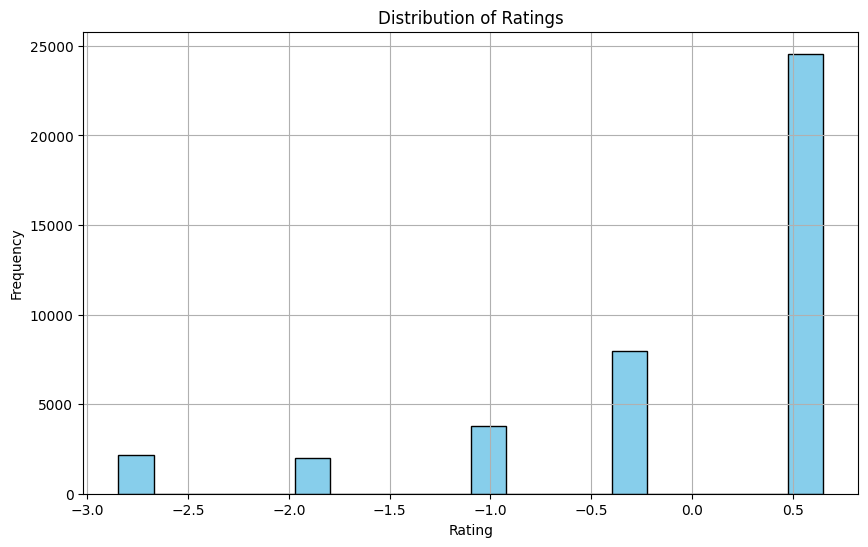

In [7]:
# Histograms
plt.figure(figsize=(10, 6))
plt.hist(df['rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [8]:
# Top 20 most common words

# Convert float values to strings before concatenating
all_reviews = ' '.join(str(review) for review in df['text_'] if isinstance(review, str))

# Tokenize the text into individual words
words = all_reviews.split()

# Count the frequency of each word
word_counts = Counter(words)

print("Top 20 most common words:")
for i, (word, count) in enumerate(word_counts.most_common(20), 1):
    print(f"{i}. {word}: {count} times")

Top 20 most common words:
1. great: 16420 times
2. book: 15002 times
3. good: 14200 times
4. one: 13395 times
5. love: 10805 times
6. would: 10362 times
7. well: 10279 times
8. story: 9627 times
9. like: 9428 times
10. read: 8868 times
11. little: 8144 times
12. get: 6467 times
13. recommend: 6179 times
14. characters: 6151 times
15. really: 6119 times
16. use: 5923 times
17. bought: 5736 times
18. also: 5721 times
19. movie: 5548 times
20. im: 5269 times


In [9]:
df.iloc[0:9]['text_']

0    love well made sturdy comfortable love itvery ...
1    love great upgrade original ive mine couple years
2              pillow saved back love look feel pillow
3          missing information use great product price
4                 nice set good quality set two months
5                             wanted different flavors
6                perfect touch thing wish little space
7    done fit well look great love smoothness edges...
8    great big numbers easy read thing didnt like size
Name: text_, dtype: object

In [10]:
#worst 5, genuine
df[df['label'] == 1][['rating', 'label', 'text_']].sort_values(by='rating').head(5)

,rating,label,text_
40430,-2.845815,1,liked nothing dress reason gave stars ordered ...
22082,-2.845815,1,bought totally happy two us strong dog top nic...
3992,-2.845815,1,kitchen aid went south time try something else...
3990,-2.845815,1,ok product easy use product works mevery prett...
22109,-2.845815,1,listened reviewers quality good really best on...


In [11]:
#worst 5, fake
df[df['label'] == 0][['rating', 'label', 'text_']].sort_values(by='rating').head(5)

,rating,label,text_
14625,-2.845815,0,hyped watch movie theater let movie good decen...
13845,-2.845815,0,boy shags strainge woman woods starts change f...
13844,-2.845815,0,need select different scenes show college clas...
13842,-2.845815,0,satisfied dvd especially sound clear fades sce...
22728,-2.845815,0,even though best value rat pellets price worth...


In [12]:
#best 5, genuine
df[df['label'] == 1][['rating', 'label', 'text_']].sort_values(by='rating', ascending = False).head(5)

,rating,label,text_
0,0.649651,1,love well made sturdy comfortable love itvery ...
23277,0.649651,1,package arrived within resonable time frame in...
23233,0.649651,1,third upgrade thought would nice addition litt...
23240,0.649651,1,well made easy clean keep house use go bed thi...
23241,0.649651,1,reluctant buy shipping bit slow however able g...


In [13]:
#best 5, fake
df[df['label'] == 0][['rating', 'label', 'text_']].sort_values(by='rating', ascending = False).head(5)

,rating,label,text_
55,0.649651,0,perfect exactly looking
23361,0.649651,0,tried product different cats two gobbled table...
23328,0.649651,0,great product natures miracle jaw scoop helps ...
23329,0.649651,0,oldest cat years gi tract issues occasionally ...
23332,0.649651,0,love harness bigs dogs walk regularly switched...


## Word frequency analysis on genuine and fake reviews

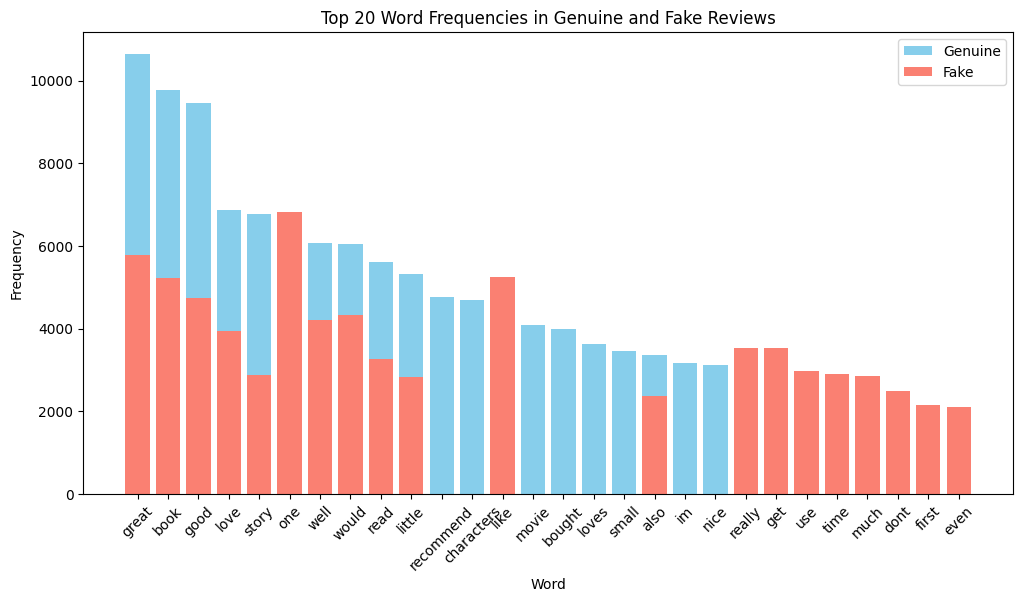

In [14]:
# Tokenize function
def tokenize(text):
    if isinstance(text, str):
        return word_tokenize(text)
    else:
        return []

# Separate genuine and fake reviews
genuine_reviews = df[df['label'] == 1]['text_']
fake_reviews = df[df['label'] == 0]['text_']

# Tokenize genuine reviews
genuine_tokens = genuine_reviews.apply(tokenize)

# Tokenize fake reviews
fake_tokens = fake_reviews.apply(tokenize)

# Flatten the list of tokens
genuine_words = [word for sublist in genuine_tokens for word in sublist]
fake_words = [word for sublist in fake_tokens for word in sublist]

# Count word frequency for genuine reviews
genuine_word_freq = Counter(genuine_words)

# Count word frequency for fake reviews
fake_word_freq = Counter(fake_words)

# Plot word frequency distributions
plt.figure(figsize=(12, 6))
plt.bar(*zip(*genuine_word_freq.most_common(20)), color='skyblue', label='Genuine')
plt.bar(*zip(*fake_word_freq.most_common(20)), color='salmon', label='Fake')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Word Frequencies in Genuine and Fake Reviews')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [15]:
# Convert float values to strings before concatenating for genuine reviews
genuine_reviews_str = ' '.join(str(review) for review in genuine_reviews if isinstance(review, str))

# Tokenize the text into individual words for genuine reviews
genuine_words = genuine_reviews_str.split()

# Count the frequency of each word for genuine reviews
genuine_word_counts = Counter(genuine_words)

# Print the top 20 most common words for genuine reviews
print("Top 20 most common words in Genuine Reviews:")
for i, (word, count) in enumerate(genuine_word_counts.most_common(20), 1):
    print(f"{i}. {word}: {count} times")

# Convert float values to strings before concatenating for fake reviews
fake_reviews_str = ' '.join(str(review) for review in fake_reviews if isinstance(review, str))

# Tokenize the text into individual words for fake reviews
fake_words = fake_reviews_str.split()

# Count the frequency of each word for fake reviews
fake_word_counts = Counter(fake_words)

# Print the top 20 most common words for fake reviews
print("\nTop 20 most common words in Fake Reviews:")
for i, (word, count) in enumerate(fake_word_counts.most_common(20), 1):
    print(f"{i}. {word}: {count} times")


Top 20 most common words in Genuine Reviews:
1. great: 10645 times
2. book: 9783 times
3. good: 9451 times
4. love: 6863 times
5. story: 6761 times
6. one: 6585 times
7. well: 6061 times
8. would: 6037 times
9. read: 5609 times
10. little: 5318 times
11. recommend: 4765 times
12. characters: 4696 times
13. like: 4184 times
14. movie: 4096 times
15. bought: 3981 times
16. loves: 3639 times
17. small: 3466 times
18. also: 3361 times
19. im: 3164 times
20. nice: 3116 times

Top 20 most common words in Fake Reviews:
1. one: 6810 times
2. great: 5775 times
3. like: 5244 times
4. book: 5219 times
5. good: 4749 times
6. would: 4325 times
7. well: 4218 times
8. love: 3942 times
9. really: 3534 times
10. get: 3525 times
11. read: 3259 times
12. use: 2978 times
13. time: 2897 times
14. story: 2866 times
15. much: 2852 times
16. little: 2826 times
17. dont: 2482 times
18. also: 2360 times
19. first: 2162 times
20. even: 2114 times


## Top 20 words that ONLY show up in fake reviews

In [16]:
# Get the set of words in fake reviews and genuine reviews
fake_words_set = set(fake_words)
genuine_words_set = set(genuine_words)

# Find the words that only appear in fake reviews
only_in_fake = fake_words_set - genuine_words_set

# Count the frequency of each word that only appears in fake reviews
only_in_fake_freq = {word: fake_words.count(word) for word in only_in_fake}

# Get the top 20 words with the highest frequency that only appear in fake reviews
top_fake_only_words = sorted(only_in_fake_freq.items(), key=lambda x: x[1], reverse=True)[:20]

# Print the top 20 words that only appear in fake reviews
print("Top 20 words that only show up in Fake Reviews:")
for i, (word, freq) in enumerate(top_fake_only_words, 1):
    print(f"{i}. {word}: {freq} times")


KeyboardInterrupt: 

## Top 20 words that show up more in fake reviews than genuine reviews

In [ ]:
# Calculate word frequency differences between fake and genuine reviews
word_freq_diff = fake_word_counts - genuine_word_counts

# Extract the top 20 words with the highest frequency differences
top_fake_words = word_freq_diff.most_common(20)

# Print the top 20 words that only show up in fake reviews
print("Top 20 words that show up more in Fake Reviews:")
for i, (word, freq_diff) in enumerate(top_fake_words, 1):
    print(f"{i}. {word}: {freq_diff} times more common in fake reviews")


In [ ]:
# Use spaCy to analyze the review text and give initial ratings distributions

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Preprocess text data to handle float values
text_data = [str(text) for text in df['text_']]

# Iterate through each review text and analyze using spaCy
review_ratings = []
for text in text_data:
    doc = nlp(text)
    # assume some random initial rating based on the length of the text
    review_ratings.append(len(doc) / 100)

# Add the calculated ratings to the DataFrame
df['initial_rating'] = review_ratings

# Display the DataFrame with the initial ratings
print(df[['text_', 'initial_rating']].head())


In [ ]:
# Iterate through each review text and analyze using spaCy
review_ratings = []
for text in text_data:
    doc = nlp(text)
    # Calculate initial rating based on the presence of top 15 most common words
    rating = sum(1 for token in doc if token.text.lower() in top_15_words) / len(top_15_words)
    review_ratings.append(rating)

# Add the calculated ratings to the DataFrame
df['initial_rating'] = review_ratings

# Display the DataFrame with the initial ratings
print(df[['text_', 'initial_rating']].head())


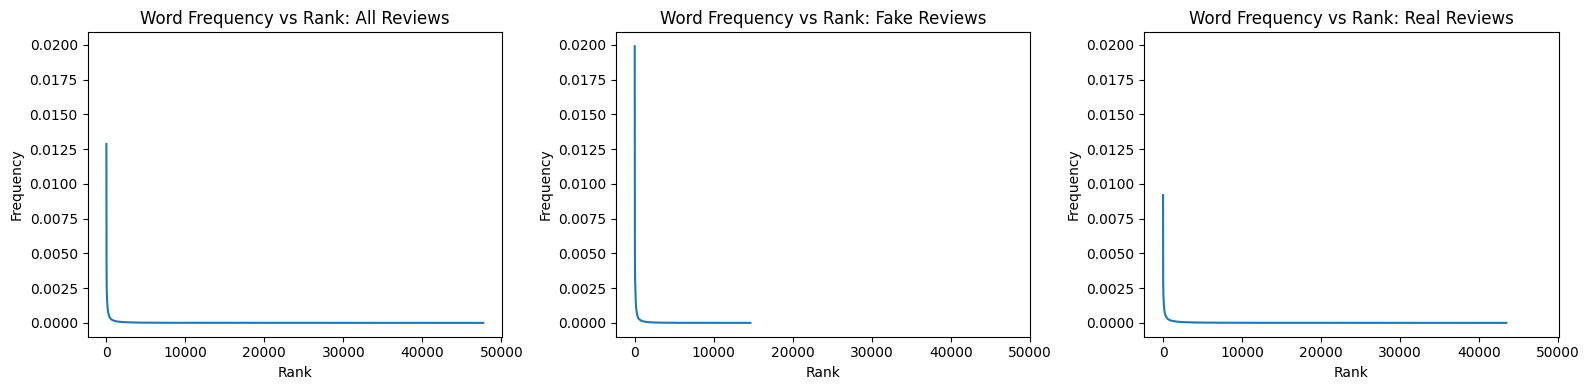

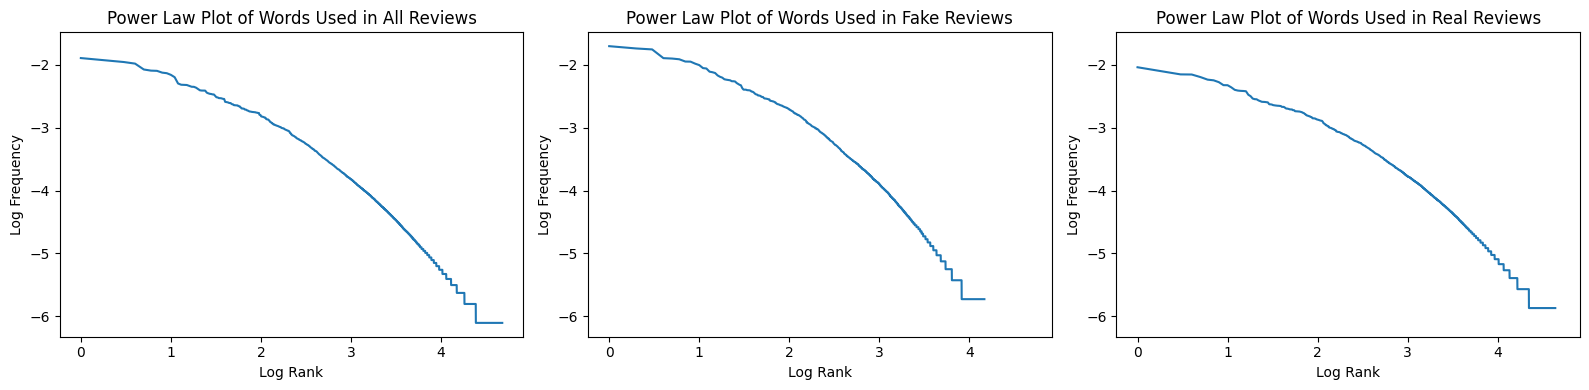

In [25]:
# Generate plots of word frequency vs. rank

all_words = []
cg_words = []
or_words = []


for i in df.index:
    s = df.loc[i, "text_"]
    if s == np.nan:
        continue
    words = str(s).split(" ")
    if df.loc[i, "label"] == 1:
        for w in words:
            all_words.append(w)
            cg_words.append(w)
    else:
        for w in words:
            all_words.append(w)
            or_words.append(w)
            
word_counts = pd.Series(all_words).value_counts()
cg_word_counts = pd.Series(cg_words).value_counts()
or_word_counts = pd.Series(or_words).value_counts()

nwords = word_counts.shape[0]
cg_nwords = cg_word_counts.shape[0]
or_nwords = or_word_counts.shape[0]

xmin = word_counts.shape[0] * -0.05
xmax =  word_counts.shape[0] * 1.05
yl = max(max(word_counts) / word_counts.sum(), max(cg_word_counts) / cg_word_counts.sum(), max(or_word_counts) / or_word_counts.sum())
ymax = yl * 1.05
ymin = yl * -0.05

fig, axs = plt.subplots(ncols=3, figsize=(16, 4))

axs[0].plot(range(1, nwords + 1), word_counts / word_counts.sum())
axs[0].set_title("Word Frequency vs Rank: All Reviews")
axs[0].set_xlabel("Rank")
axs[0].set_ylabel("Frequency")
axs[0].set_xlim((xmin, xmax))
axs[0].set_ylim((ymin, ymax))

axs[1].plot(range(1, cg_nwords + 1), cg_word_counts / cg_word_counts.sum())
axs[1].set_title("Word Frequency vs Rank: Fake Reviews")
axs[1].set_xlabel("Rank")
axs[1].set_ylabel("Frequency")
axs[1].set_xlim((xmin, xmax))
axs[1].set_ylim((ymin, ymax))

axs[2].plot(range(1, or_nwords + 1), or_word_counts / or_word_counts.sum())
axs[2].set_title("Word Frequency vs Rank: Real Reviews")
axs[2].set_xlabel("Rank")
axs[2].set_ylabel("Frequency")
axs[2].set_xlim((xmin, xmax))
axs[2].set_ylim((ymin, ymax))

plt.tight_layout()

fig, axs = plt.subplots(ncols=3, figsize=(16, 4))

xmin = np.log(word_counts.shape[0]) / np.log(10) * -0.05
xmax =  np.log(word_counts.shape[0]) / np.log(10)* 1.05
ymax = max(np.log(word_counts) / np.log(10)) * 1.05
ymin = max(np.log(word_counts) / np.log(10)) * -0.05

ymx = np.log(max(word_counts.max() / word_counts.sum(), cg_word_counts.max() / cg_word_counts.sum(), or_word_counts.max() / or_word_counts.sum())) / np.log(10)
ymn = np.log(min(word_counts.min() / word_counts.sum(), cg_word_counts.min() / cg_word_counts.sum(), or_word_counts.min() / or_word_counts.sum())) / np.log(10)

yd = ymx - ymn

ymax = ymx + yd * 0.05
ymin = ymn - yd * 0.05
    

axs[0].plot(np.log(range(1, nwords + 1)) / np.log(10), np.log(word_counts / word_counts.sum()) / np.log(10))
axs[0].set_title("Power Law Plot of Words Used in All Reviews")
axs[0].set_xlabel("Log Rank")
axs[0].set_ylabel("Log Frequency")
axs[0].set_xlim((xmin, xmax))
axs[0].set_ylim((ymin, ymax))


axs[1].plot(np.log(range(1, cg_nwords + 1)) / np.log(10), np.log(cg_word_counts / cg_word_counts.sum()) / np.log(10))
axs[1].set_title("Power Law Plot of Words Used in Fake Reviews")
axs[1].set_xlabel("Log Rank")
axs[1].set_ylabel("Log Frequency")
axs[1].set_xlim((xmin, xmax))
axs[1].set_ylim((ymin, ymax))

axs[2].plot(np.log(range(1, or_nwords + 1)) / np.log(10), np.log(or_word_counts / or_word_counts.sum()) / np.log(10))
axs[2].set_title("Power Law Plot of Words Used in Real Reviews")
axs[2].set_xlabel("Log Rank")
axs[2].set_ylabel("Log Frequency")
axs[2].set_xlim((xmin, xmax))
axs[2].set_ylim((ymin, ymax))

plt.tight_layout()
